In [100]:
import pandas as pd

In [101]:
df = pd.read_csv("Netflix Dataset.csv")
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [102]:
df.columns

Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')

In [103]:
df.dtypes

Show_Id         object
Category        object
Title           object
Director        object
Cast            object
Country         object
Release_Date    object
Rating          object
Duration        object
Type            object
Description     object
dtype: object

In [104]:
df[df.duplicated()]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
6300,s684,Movie,Backfire,Dave Patten,"Black Deniro, Byron ""Squally"" Vinson, Dominic ...",United States,"April 5, 2019",TV-MA,97 min,"Dramas, Independent Movies, Thrillers",When two would-be robbers accidentally kill a ...
6622,s6621,Movie,The Lost Okoroshi,Abba T. Makama,"Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...",Nigeria,"September 4, 2020",TV-MA,94 min,"Comedies, Dramas, Independent Movies",A disillusioned security guard transforms into...


In [105]:
df.drop_duplicates(inplace=True)
df[df.duplicated()]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7787 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7787 non-null   object
 1   Category      7787 non-null   object
 2   Title         7787 non-null   object
 3   Director      5399 non-null   object
 4   Cast          7069 non-null   object
 5   Country       7280 non-null   object
 6   Release_Date  7777 non-null   object
 7   Rating        7780 non-null   object
 8   Duration      7787 non-null   object
 9   Type          7787 non-null   object
 10  Description   7787 non-null   object
dtypes: object(11)
memory usage: 730.0+ KB


In [107]:
import seaborn as sns

<Axes: >

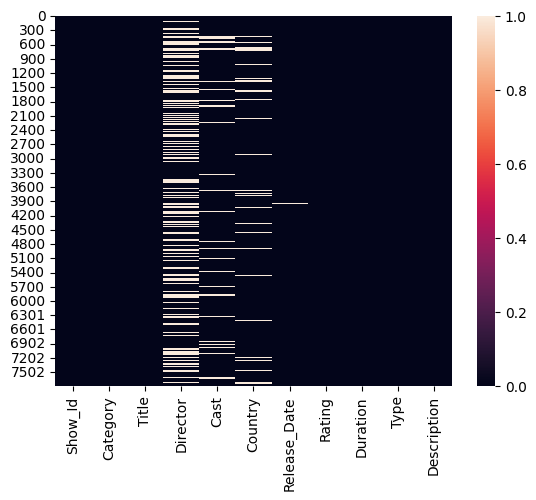

In [108]:
sns.heatmap(df.isnull())

Determining the show ID and director for the TV show 'House of Cards.'

In [109]:
df[['Show_Id', 'Director']][df.Title == "House of Cards"]

,Show_Id,Director
2832,s2833,"Robin Wright, David Fincher, Gerald McRaney, J..."


Identifying the year with the highest number of TV shows and movies released, presented using a bar graph.

In [110]:
import datetime
df['Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df['Date'].dt.year.value_counts()

Date
2019.0    2136
2020.0    2008
2018.0    1661
2017.0    1201
2016.0     432
2021.0     117
2015.0      79
2014.0      24
2011.0      13
2013.0      10
2012.0       3
2008.0       2
2009.0       2
2010.0       1
Name: count, dtype: int64

<Axes: xlabel='Date'>

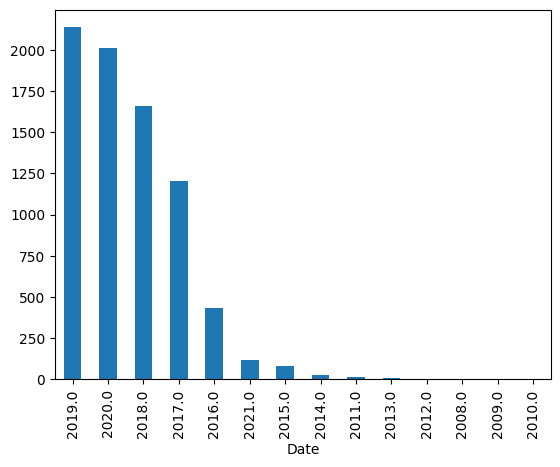

In [111]:
df['Date'].dt.year.value_counts().plot.bar()

Analyzing the distribution of movies and TV shows in the dataset, visualized with a count plot.

<Axes: xlabel='Category', ylabel='count'>

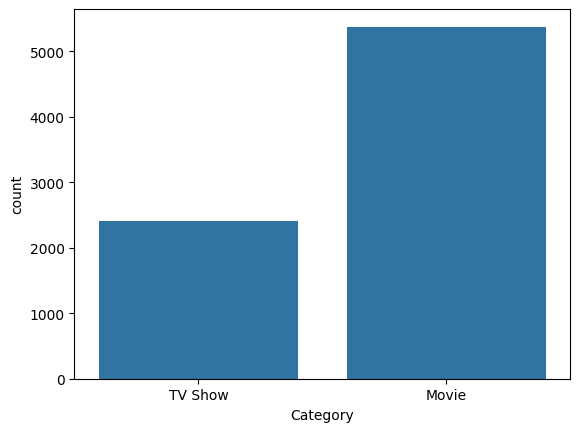

In [112]:
sns.countplot(x='Category', data=df)

Listing all movies released in the year 2020.

In [113]:
df[(df['Category'] == 'Movie') & (df['Date'].dt.year == 2020)]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",2020-06-01
14,s15,Movie,3022,John Suits,"Omar Epps, Kate Walsh, Miranda Cosgrove, Angus...",United States,"March 19, 2020",R,91 min,"Independent Movies, Sci-Fi & Fantasy, Thrillers",Stranded when the Earth is suddenly destroyed ...,2020-03-19
27,s28,Movie,#Alive,Cho Il,"Yoo Ah-in, Park Shin-hye",South Korea,"September 8, 2020",TV-MA,99 min,"Horror Movies, International Movies, Thrillers","As a grisly virus rampages a city, a lone man ...",2020-09-08
28,s29,Movie,#AnneFrank - Parallel Stories,"Sabina Fedeli, Anna Migotto","Helen Mirren, Gengher Gatti",Italy,"July 1, 2020",TV-14,95 min,"Documentaries, International Movies","Through her diary, Anne Frank's story is retol...",2020-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...
7762,s7761,Movie,Zaki Chan,Wael Ihsan,"Ahmed Helmy, Yasmin Abdulaziz, Hassan Hosny, H...",Egypt,"May 19, 2020",TV-PG,109 min,"Comedies, International Movies, Romantic Movies",An unqualified young man has his work cut out ...,2020-05-19
7783,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020-01-11
7784,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020-10-19
7786,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020-09-25


Displaying titles of TV shows released exclusively in India.

In [114]:
df['Title'][(df['Category'] == 'TV Show') & (df['Country'] == 'India')]

86            21 Sarfarosh: Saragarhi 1897
132                              7 (Seven)
340                           Agent Raghav
364                           Akbar Birbal
533                    Anjaan: Rural Myths
                       ...                
6249                  The Creative Indians
6400    The Golden Years with Javed Akhtar
6469                The House That Made Me
7294                            Typewriter
7705                       Yeh Meri Family
Name: Title, Length: 71, dtype: object

Identifying the top 10 directors with the highest number of contributions to Netflix.

In [115]:
df['Director'].value_counts().head(10)

Director
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
Jay Chapman               12
Martin Scorsese           12
Steven Spielberg          10
David Dhawan               9
Lance Bangs                8
Name: count, dtype: int64

Retrieving records for movies or shows categorized as "Comedies" or released in the United Kingdom.

In [116]:
df[(df['Type'] == 'Comedies') | (df['Country'] == 'United Kingdom')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date
19,s20,Movie,'89,NaN,"Lee Dixon, Ian Wright, Paul Merson",United Kingdom,"May 16, 2018",TV-PG,87 min,Sports Movies,"Mixing old footage with interviews, this is th...",2018-05-16
33,s34,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017-09-08
58,s59,TV Show,100% Hotter,NaN,"Daniel Palmer, Melissa Sophia, Karen Williams,...",United Kingdom,"November 1, 2019",TV-14,1 Season,"British TV Shows, International TV Shows, Real...","A stylist, a hair designer and a makeup artist...",2019-11-01
72,s73,Movie,17 Again,Burr Steers,"Zac Efron, Leslie Mann, Matthew Perry, Thomas ...",United States,"January 1, 2021",PG-13,102 min,Comedies,"Nearing a midlife crisis, thirty-something Mik...",2021-01-01
82,s83,Movie,2036 Origin Unknown,Hasraf Dulull,"Katee Sackhoff, Ray Fearon, Julie Cox, Steven ...",United Kingdom,"December 20, 2018",TV-14,95 min,Sci-Fi & Fantasy,Working with an artificial intelligence to inv...,2018-12-20
...,...,...,...,...,...,...,...,...,...,...,...,...
7670,s7669,TV Show,World War II in Colour,NaN,Robert Powell,United Kingdom,"August 1, 2017",TV-MA,1 Season,"British TV Shows, Docuseries, International TV...",Footage of the most dramatic moments from Worl...,2017-08-01
7671,s7670,TV Show,World's Busiest Cities,NaN,"Anita Rani, Ade Adepitan, Dan Snow",United Kingdom,"February 1, 2019",TV-PG,1 Season,"British TV Shows, Docuseries","From Moscow to Mexico City, three BBC journali...",2019-02-01
7688,s7687,Movie,XV: Beyond the Tryline,Pierre Deschamps,NaN,United Kingdom,"March 18, 2020",TV-14,91 min,"Documentaries, Sports Movies","Set against the 2015 Rugby World Cup, this doc...",2020-03-18
7725,s7724,Movie,You Can Tutu,James Brown,"Lily O'Regan, Jeannettsy Enriquez Borges, Joel...",United Kingdom,"December 31, 2017",TV-G,87 min,Children & Family Movies,A gifted young ballet dancer struggles to find...,2017-12-31


Counting instances where Tom Cruise was cast.

In [117]:
print('Instances where Tom Cruise was cast: ', df[df['Cast'].str.contains('Tom Cruise') == True].shape[0])

Instances where Tom Cruise was cast:  2


Exploring unique ratings defined by Netflix, and finding the number of 'TV-14' rated movies in Canada.

In [118]:
df.Rating.value_counts()

Rating
TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: count, dtype: int64

In [119]:
print('Number of TV-14 rated movies in Canada: ',
      df[(df['Rating'] == 'TV-14') & (df['Country'] == 'Canada') & (df['Category'] == 'Movie')].shape[0])

Number of TV-14 rated movies in Canada:  11


Determining the maximum duration of a movie or show on Netflix.

In [120]:
df[['Duration_value', 'Duration_unit']] = df['Duration'].str.split(' ', expand=True)
df['Duration_unit'].unique()

array(['Seasons', 'min', 'Season'], dtype=object)

In [121]:
print('Maximum duration of a movie or show on Netflix:\n',
      'Minute: ',
      df['Duration_value'][df['Duration_unit'] == 'min'].max(),
      '\nSeasons: ',
      df['Duration_value'][df['Duration_unit'] == 'Seasons'].max())

Maximum duration of a movie or show on Netflix:
 Minute:  99 
Seasons:  9


Identifying the country with the highest number of TV shows.

In [122]:
print('Country with the highest number of TV shows:\n',
      df['Country'][df['Category'] == 'TV Show'].value_counts().head(1))

Country with the highest number of TV shows:
 Country
United States    705
Name: count, dtype: int64


Sorting the dataset based on the release year in descending order.

In [123]:
df.sort_values('Date', ascending=False, inplace=True)
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date,Duration_value,Duration_unit
205,s206,Movie,A Monster Calls,J.A. Bayona,"Lewis MacDougall, Sigourney Weaver, Felicity J...","United Kingdom, Spain, United States","January 16, 2021",PG-13,108 min,"Dramas, Sci-Fi & Fantasy","Overwhelmed by his mother’s illness, a young b...",2021-01-16,108,min
1673,s1674,Movie,Death of Me,Darren Lynn Bousman,"Maggie Q, Luke Hemsworth, Alex Essoe, Ingkarat...","United States, Thailand","January 16, 2021",R,94 min,Horror Movies,"With no memory of the previous night, a vacati...",2021-01-16,94,min
5060,s5060,Movie,Radium Girls,"Lydia Dean Pilcher, Ginny Mohler","Joey King, Abby Quinn, Cara Seymour, Scott She...",United States,"January 16, 2021",TV-14,103 min,"Dramas, Independent Movies",When the women at a radium factory begin to fa...,2021-01-16,103,min
2799,s2800,Movie,Hook,Steven Spielberg,"Dustin Hoffman, Robin Williams, Julia Roberts,...",United States,"January 15, 2021",PG,142 min,Children & Family Movies,"Peter Pan, now grown up and a workaholic, must...",2021-01-15,142,min
3472,s3473,TV Show,Kuroko's Basketball,NaN,"Kensho Ono, Yuki Ono, Chiwa Saito, Yoshimasa H...",Japan,"January 15, 2021",TV-MA,1 Season,"Anime Series, International TV Shows, Teen TV ...",Five middle school basketball stars went to se...,2021-01-15,1,Season


Extracting instances where the category is 'Movie' and the type is 'Dramas,' or the category is 'TV Show' and the type is 'Kids TV.'

In [124]:
df[((df['Category'] == 'Movie') & (df['Type'] == 'Dramas'))
   |((df['Category'] == 'TV Show') & (df['Type'] == 'Kids TV'))]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date,Duration_value,Duration_unit
4855,s4855,Movie,Pieces of a Woman,Kornél Mundruczó,"Vanessa Kirby, Shia LaBeouf, Ellen Burstyn, Mo...","Canada, Hungary, United States","January 7, 2021",R,128 min,Dramas,A heartbreaking home birth leaves a woman grap...,2021-01-07,128,min
1242,s1243,Movie,Catch Me If You Can,Steven Spielberg,"Leonardo DiCaprio, Tom Hanks, Christopher Walk...","United States, Canada","January 1, 2021",PG-13,141 min,Dramas,An FBI agent makes it his mission to put cunni...,2021-01-01,141,min
1501,s1502,Movie,Cops and Robbers,"Arnon Manor, Timothy Ware-Hill",Timothy Ware-Hill,United States,"December 28, 2020",PG-13,8 min,Dramas,Animation and activism unite in this multimedi...,2020-12-28,8,min
6667,s6666,Movie,The Midnight Sky,George Clooney,"George Clooney, Felicity Jones, Kyle Chandler,...",United States,"December 23, 2020",PG-13,119 min,Dramas,"In the aftermath of a global catastrophe, a lo...",2020-12-23,119,min
613,s614,Movie,Atlas Shrugged: Part II,John Putch,"Samantha Mathis, Jason Beghe, Esai Morales, Pa...",United States,"December 19, 2020",PG-13,112 min,Dramas,"With the world's economy in dire straits, corp...",2020-12-19,112,min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5833,s5833,Movie,Strange Voices,Arthur Allan Seidelman,"Nancy McKeon, Valerie Harper, Stephen Macht, T...",United States,"October 1, 2011",TV-PG,96 min,Dramas,When their college-age daughter suddenly begin...,2011-10-01,96,min
7364,s7363,Movie,Unspeakable Acts,Linda Otto,"Jill Clayburgh, Brad Davis, Sam Behrens",United States,"October 1, 2011",TV-14,95 min,Dramas,Laurie and Joseph are doctors who interview se...,2011-10-01,95,min
7151,s7150,Movie,Too Young the Hero,Buzz Kulik,"Ricky Schroder, Jon DeVries, Debra Mooney, Mar...",United States,"October 1, 2011",TV-MA,94 min,Dramas,Twelve-year-old Calvin manages to join the nav...,2011-10-01,94,min
232,s233,Movie,A Stoning in Fulham County,Larry Elikann,"Ken Olin, Jill Eikenberry, Maureen Mueller, Gr...",United States,"October 1, 2011",TV-14,95 min,Dramas,"After reckless teens kill an Amish child, a pr...",2011-10-01,95,min


In [125]:
import numpy as np

In [126]:
df.sort_index(ascending=True, inplace=True)
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date,Duration_value,Duration_unit
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14,4,Seasons
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23,93,min
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20,78,min
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017-11-16,80,min
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01,123,min


In [127]:
show_country_id_list_1 = [] #list for foreign key in df
show_country_id_list_2 = [] #list for primary key in all_countries_df
show_country_id = 'SC'
show_country_counter = 1

all_countries_list = []
countries_list = df['Country'].str.split(', ')
countries_list.replace(np.nan, 'N/A', inplace=True)
countries_list = list(countries_list)

for countries in countries_list:
    if countries == 'N/A':
        show_country_id_list_1.append(np.nan)
    elif countries != 'N/A':
        show_country_id = 'SC' + str(show_country_counter)
        show_country_id_list_1.append(show_country_id)
        for country in countries:
            show_country_id_list_2.append(show_country_id)
            all_countries_list.append(country)
        show_country_counter += 1

all_countries_df = pd.DataFrame(columns=['Show_Country_ID', 'Countries'])
all_countries_df.Show_Country_ID = pd.Series(show_country_id_list_2)
all_countries_df.Countries = pd.Series(all_countries_list)
all_countries_df.head()

,Show_Country_ID,Countries
0,SC1,Brazil
1,SC2,Mexico
2,SC3,Singapore
3,SC4,United States
4,SC5,United States


In [128]:
all_countries_df.to_csv('Netflix Content by Country.csv')

In [129]:
show_type_id_list_1 = [] #list for foreign key in df
show_type_id_list_2 = [] #list for primary key in all_types_df
show_type_id = 'ST'
show_type_counter = 1

all_types_list = []
types_list = df['Type'].str.split(', ')
types_list.replace(np.nan, 'N/A', inplace=True)
types_list = list(types_list)

for types in types_list:
    if types == 'N/A':
        show_type_id_list_1.append(np.nan)
    elif types != 'N/A':
        show_type_id = 'ST' + str(show_type_counter)
        show_type_id_list_1.append(show_type_id)
        for type in types:
            show_type_id_list_2.append(show_type_id)
            all_types_list.append(type)
        show_type_counter += 1

all_types_df = pd.DataFrame(columns=['Show_Type_ID', 'Types'])
all_types_df.Show_Type_ID = pd.Series(show_type_id_list_2)
all_types_df.Types = pd.Series(all_types_list)
all_types_df.head()

,Show_Type_ID,Types
0,ST1,International TV Shows
1,ST1,TV Dramas
2,ST1,TV Sci-Fi & Fantasy
3,ST2,Dramas
4,ST2,International Movies


In [133]:
all_types_df.to_csv('Netflix Content Type by Country.csv')

In [131]:
df['Show_Country_ID'] = pd.Series(show_country_id_list_1)
df['Show_Type_ID'] = pd.Series(show_type_id_list_1)

In [132]:
df.to_csv("Netflix Dataset - cleaned.csv")